In [2]:
def read_and_convert_matrix(input_file, output_file):
    with open(input_file, 'r') as f:
        lines = f.readlines()

    # 간선 목록 생성
    edges = []
    nodes = set()
    for line in lines[1:]:
        u, v = map(int, line.split())
        edges.append((u, v))
        nodes.add(u)
        nodes.add(v)

    # 노드 개수 및 엣지 개수 계산
    n = len(nodes)
    m = len(edges)

    # 고유 노드에 대한 순차적 번호 매핑
    node_mapping = {old: new for new, old in enumerate(sorted(nodes), start=1)}

    # 매핑된 간선 목록 생성
    mapped_edges = [(node_mapping[u], node_mapping[v]) for u, v in edges]
    sorted_edges = [(u, v) if u < v else (v, u) for u, v in mapped_edges]
    sorted_edges.sort(key=lambda x: (x[1], x[0]))

    # 결과를 새로운 Matrix Market 파일로 저장
    with open(output_file, 'w') as f:
        # 새로운 헤더 작성
        f.write('%MatrixMarket matrix coordinate pattern symmetric\n')
        f.write(f'{n} {n} {m}\n')
        for edge in sorted_edges:
            f.write(f'{edge[0]} {edge[1]}\n')

# 입력 및 출력 파일 경로
input_file = './datasets/web-EPA.edges'  # 원본 파일 경로
output_file = './datasets/web-EPA.mtx'  # 변환된 파일 경로
#mapping_file = './datasets/soc-wiki-node-mapping.csv'  # 매핑 정보 파일 경로

# 변환 함수 호출
read_and_convert_matrix(input_file, output_file)


   outdeg1  indeg1  totaldeg1  outdeg2  indeg2  totaldeg2  totaldeg
0      1.0     0.0        1.0      0.0     0.0        0.0       1.0
1      0.0     1.0        1.0      0.0     0.0        0.0       1.0
2      1.0     0.0        1.0      0.0     0.0        0.0       1.0
3      1.0     0.0        1.0      0.0     0.0        0.0       1.0
4      0.0     1.0        1.0      0.0     0.0        0.0       1.0


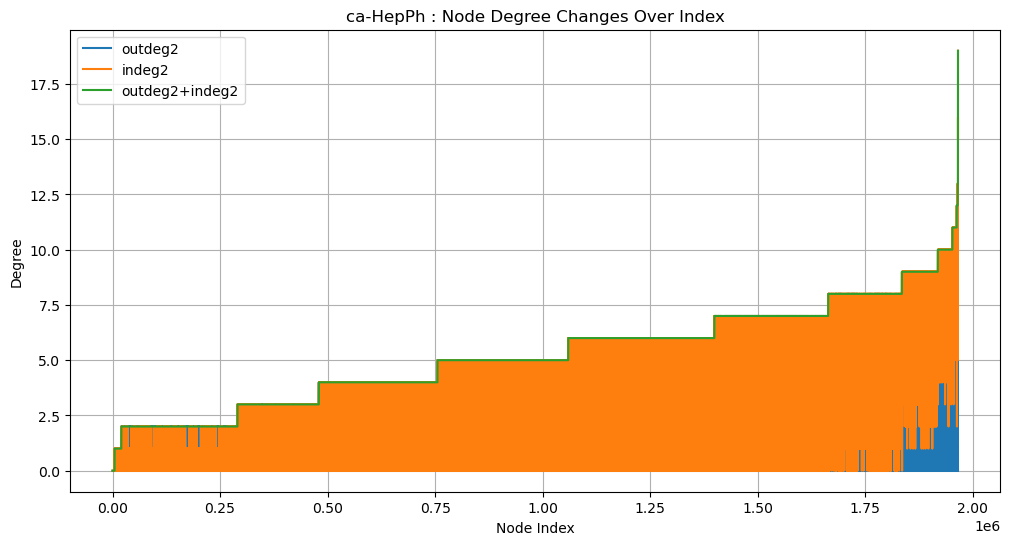

In [3]:
# degree distribution

import pandas as pd
import matplotlib.pyplot as plt

# txt 파일에서 데이터 읽기
file_path = './degree/roadNet-CA.txt'
with open(file_path, 'r') as file:
    header = file.readline().strip().split()  
    data = file.readlines()  

df = pd.DataFrame([line.strip().split() for line in data], columns=header)

df = df.astype(float)

#df['outdeg2_times_indeg2'] = df['outdeg2'] * df['indeg2']

print(df.head())

plt.figure(figsize=(12, 6))

column_list = ['outdeg2', 'indeg2']
for col in column_list:
    plt.plot(df.index, df[col], label=col)
plt.plot(df.index, df[column_list[0]] + df[column_list[1]], label="outdeg2+indeg2")

plt.xlabel('Node Index')
plt.ylabel('Degree')
plt.title('ca-HepPh : Node Degree Changes Over Index')
plt.legend()
#plt.yscale('log')
plt.grid(True)
plt.show()

In [17]:
edges = {
  #"ca-dblp-2012" : [],
  "ca-CondMat" : [93439, 1076554, 52621088, 172437459],  
  #"ca-HepTh" : [25973, 179448, 5410359, 29901035],  
  "web-arabic-2005" : [1747269, 3057822, 74958891, 4268922538],  
  #"web-indochina-2004" : [47606, 424501, 12275605, 42204026],
  "socfb-Middlebury45" : [124610, 2354397, 2279030, 1117926],        
  "socfb-Hamilton46" : [96394, 1571089, 1058160, 597954],  
  "socfb-Haverford76" : [59589, 703127, 320760, 190975],  
  "tags-ask-ubuntu" : [132703, 3662452, 833247, 724669],
  "tags-math-sx" : [91685, 1079345, 207979, 146371],
  "roadNet-CA" : [2766607, 5122461, 15257735, 95985943],
  "roadNet-TX" : [1921660, 3520875, 10366857, 66004005],
  "roadNet-PA" : [1541898, 2879820, 8753958, 56193122]  
}


max_degree = {
  #"ca-dblp-2012" : [],
  "ca-CondMat" : [279, 3123, 16299, 20724],  
  "ca-HepTh" : [65, 573, 5325, 8081],  
  "web-arabic-2005" : [1102, 2660, 73583, 130886],  
  "web-indochina-2004" : [199, 2009, 8355, 10985],
  "socfb-Middlebury45" : [473, 2403, 2972, 2356],        
  "socfb-Hamilton46" : [602, 1948, 2227, 1862],  
  "socfb-Haverford76" : [375, 1250, 1369, 1195],  
  "tags-ask-ubuntu" : [2082, 2846, 2891, 2827],
  "tags-math-sx" : [1108, 1527, 1463, 1481],
  "roadNet-CA" : [12, 19, 65, 513],
  "roadNet-TX" : [12, 20, 64, 472],
  "roadNet-PA" : [9, 20, 65, 452]  
}

run_3 = {
  
}


run_4 = {
  
}

In [27]:
import pandas as pd 
import matplotlib.pyplot as plt

df_edges = pd.DataFrame.from_dict({
    "Dataset": list(edges.keys()),
    "E1": [edge[0] for edge in edges.values()],
    "E2": [edge[1] for edge in edges.values()],
    "E3": [edge[2] for edge in edges.values()],
    "E4" : [edge[3] for edge in edges.values()],
})

df_maxdeg = pd.DataFrame.from_dict({
    "Dataset": list(max_degree.keys()),
    "D1": [deg[0] for deg in max_degree.values()],
    "D2": [deg[1] for deg in max_degree.values()],
    "D3": [deg[2] for deg in max_degree.values()],
    "D4" : [deg[3] for deg in max_degree.values()],
})

df_edges, df_maxdeg

(               Dataset       E1       E2        E3          E4
 0           ca-CondMat    93439  1076554  52621088   172437459
 1             ca-HepTh    25973   179448   5410359    29901035
 2      web-arabic-2005  1747269  3057822  74958891  4268922538
 3   web-indochina-2004    47606   424501  12275605    42204026
 4   socfb-Middlebury45   124610  2354397   2279030     1117926
 5     socfb-Hamilton46    96394  1571089   1058160      597954
 6    socfb-Haverford76    59589   703127    320760      190975
 7      tags-ask-ubuntu   132703  3662452    833247      724669
 8         tags-math-sx    91685  1079345    207979      146371
 9           roadNet-CA  2766607  5122461  15257735    95985943
 10          roadNet-TX  1921660  3520875  10366857    66004005
 11          roadNet-PA  1541898  2879820   8753958    56193122,
                Dataset    D1    D2     D3      D4
 0           ca-CondMat   279  3123  16299   20724
 1             ca-HepTh    65   573   5325    8081
 2      web-ar

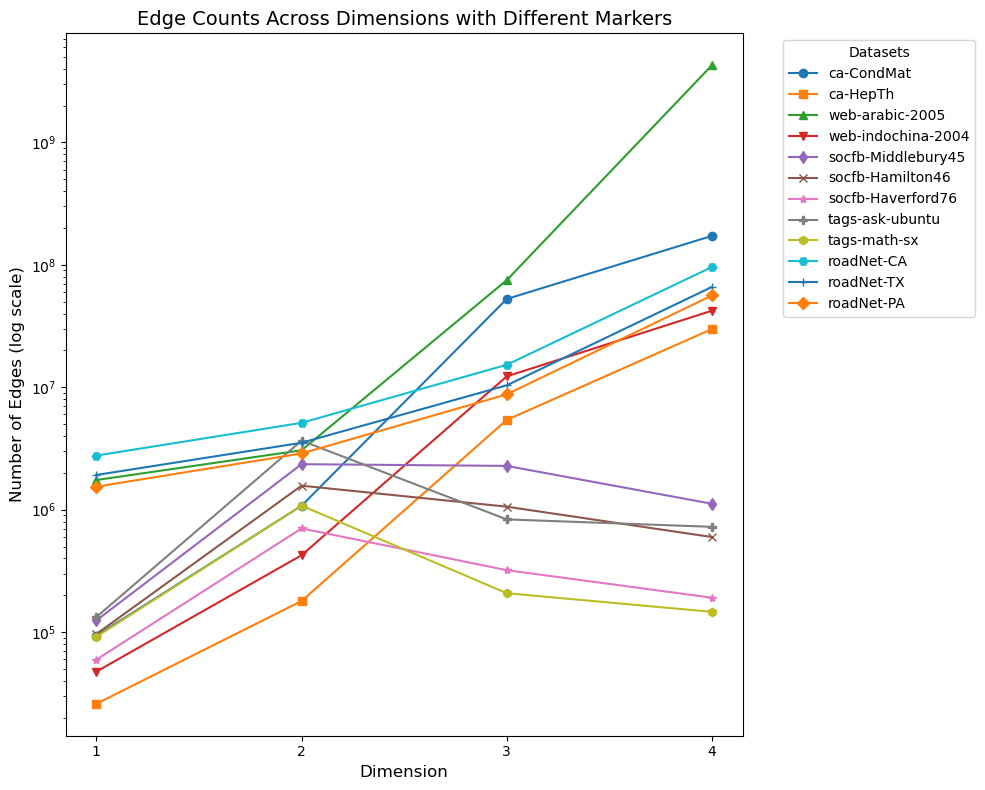

In [33]:
# Plotting the edges across dimensions for each dataset
markers = ['o', 's', '^', 'v', 'd', 'x', '*', 'P', 'h', 'H', '+', 'D', '<', '>']  # Different marker styles


fig, ax = plt.subplots(figsize=(10, 8))

# Extracting the dataset names and edge values
for index, (marker, row) in enumerate(zip(markers, df_edges.iterrows())):
    dataset_name, data = row[1]['Dataset'], row[1]
    ax.plot([1,2,3,4], 
             [data['E1'], data['E2'], data['E3'], data['E4']],
             label=dataset_name, marker=marker, linestyle='-', markersize=6)

# Setting up the plot labels and title
ax.set_xlabel('Dimension', fontsize=12)
ax.set_ylabel('Number of Edges (log scale)', fontsize=12)
ax.set_yscale('log')  # Logarithmic scale for y-axis
ax.set_xscale('linear')  # Linear scale for x-axis
ax.set_xticks([1, 2, 3, 4])

# Displaying the legend outside the plot area to avoid overlap
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Datasets")

# Adjusting layout for clarity and aesthetics
plt.title('Edge Counts Across Dimensions with Different Markers', fontsize=14)
plt.tight_layout()
plt.show()